## <center>  PROJECT-5. Поведенческая аналитика

### Цель проекта
Проанализировать поведение пользователей, а также оценить эффективность каналов их привлечения.

### Формализованные задачи
1. Обработать данные средствами Python. Код снабжен дополнительными комментариями для лучшего понимания выполняемых действий.
2. Сформулировать выводы и рекомендации.

### Принятые в анализе предпосылки
1. Данные представлены за период с 1 января по 31 марта 2020 — только по пользователям, зарегистрированным позднее 1 января 2020.
2. В выгрузке только уникальные действия пользователей за каждый день.
3. Можно миновать стадию установки приложения, если оно было установлено ранее.
4. Можно миновать стадию регистрации, если пользователь был уже залогинен на момент сессии. Однако незарегистрированные пользователи не могут оформить покупку.

### Анализ данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
data = pd.read_csv("mod_PA_2/SF_case_data.csv")
# Оценим структуру полученного датасета
data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [2]:
# Оценим датасет на наличие пропусков в данных.
data.isna().sum()

date                  0
event                 0
purchase_sum    2606585
os_name               0
device_id             0
gender                0
city                  0
utm_source            0
dtype: int64

In [3]:
# Проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   event         object 
 2   purchase_sum  float64
 3   os_name       object 
 4   device_id     int64  
 5   gender        object 
 6   city          object 
 7   utm_source    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 167.7+ MB


In [4]:
# Оценим общее количество каждого типа событий
data['event'].value_counts()

event
app_start      748705
search         708639
choose_item    538669
tap_basket     377665
app_install    154597
purchase       141383
register        78310
Name: count, dtype: int64

#### 1. *Оценим распределение всех событий по дням*

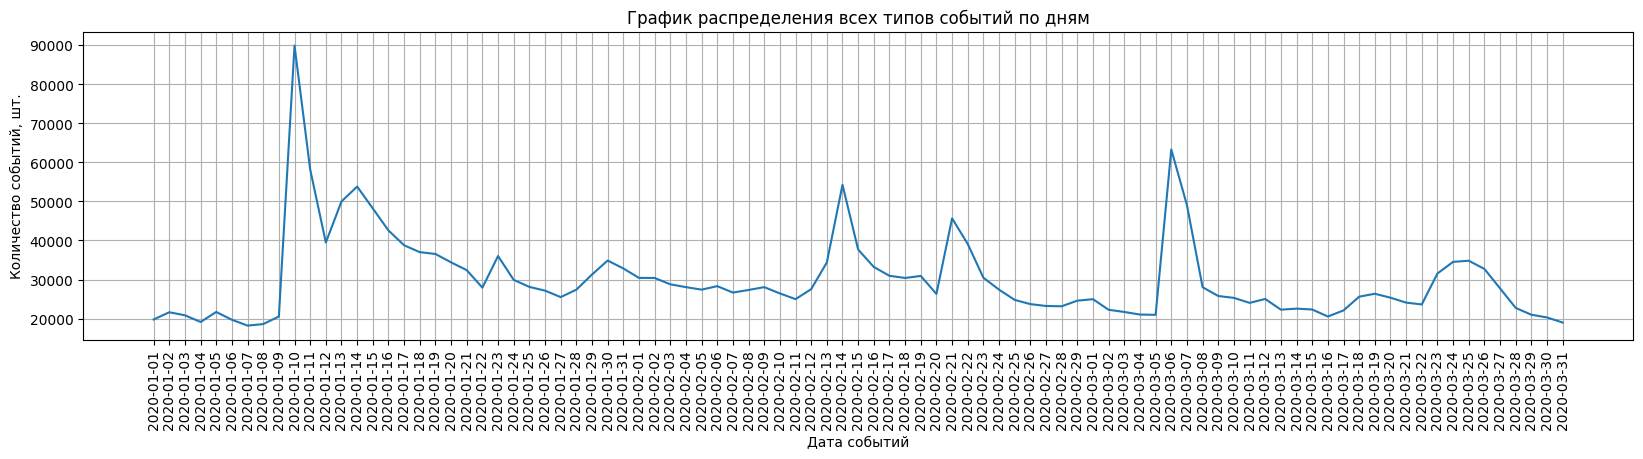

In [5]:
# Построим график распределения событий
data_event = data.groupby('date')['event'].count().reset_index()
plt.figure(figsize=(20,4))
plt.plot(data_event['date'], data_event['event'])
plt.title('График распределения всех типов событий по дням')
plt.xticks(rotation = 90)
plt.xlabel("Дата событий")
plt.ylabel("Количество событий, шт.")
plt.grid(True)
plt.show()

Исходя из полученного графика распределения событий по дням, отчетливо виден скачок количества событий 10 января 2020, 14 февраля 2020, 21 февраля 2020, 06 марта 2020, т.е. в периоды: после новогодних праздников и в день накануне праздников. Наибольшее количество событий отмечается 10 января 2020 в пятницу в неполную рабочую неделю. 
Необходимо проработать маркетинговую стратегию в будние дни (промокоды, "счастливые" часы, бонусы, подарок) и увеличить количество заказов в праздники (спецпредложения, подарки). В новогодние праздники можно выполнять рекламную рассылку с индивидуальными предложениями или наборами, это благоприятное время когда большинство людей отдыхают и готовы заказывать еду.  

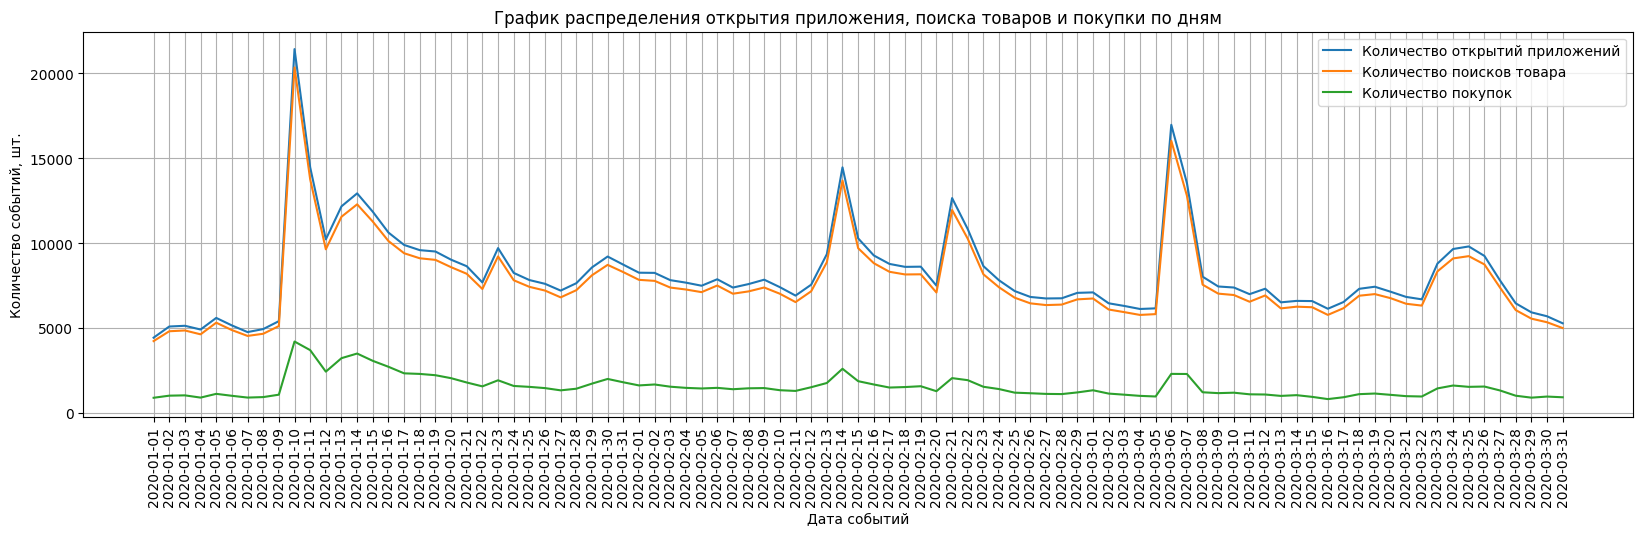

In [6]:
# Оценим пропорциональна ли зависимость между количеством открытий приложения, поиском товара и подтверждением покупки
data_app_start = data[data['event'] == 'app_start']
data_app_start = data_app_start.groupby('date').agg({'event':'count'}).reset_index()
data_search = data[data['event'] == 'search']
data_search = data_search.groupby('date').agg({'event':'count'}).reset_index()
data_purchase  = data[data['event'] == 'purchase']
data_purchase  = data_purchase.groupby('date').agg({'event':'count'}).reset_index()
plt.figure(figsize=(20,5))
x = data_event['date']
y1 = data_app_start['event']
y2 = data_search['event']
y3 = data_purchase['event']
plt.plot(x, y1, label = 'Количество открытий приложений')
plt.plot(x, y2, label = 'Количество поисков товара')
plt.plot(x, y3, label = 'Количество покупок')
plt.title('График распределения открытия приложения, поиска товаров и покупки по дням')
plt.xticks(rotation = 90)
plt.xlabel("Дата событий")
plt.ylabel("Количество событий, шт.")
plt.legend()
plt.grid()
plt.show()

Отметим прямую зависимость между открытиями приложения, поиском товаров и покупкой. Также отметим, что количество поисков товара практически равно количеству открытий приложения. Т.е. люди заходят с определенной целью: найти необходимый товар. При этом количество покупок значительно меньше, график более равномерен, т.е. большинство пользователей не оформляют покупку. Необходимо провести исследование/опрос из-за чего не происходит оформление заказа: не устраивает цена, условия доставки, нет желаемого товара. Исходя из этого, сделать корректировку предлагаемых товаров, условий доставки или учесть другие влияющие факторы.

#### 2. *Оценим распределение трафика (открытие приложения) по группам «Установили в тот же день» и «Остальные»*

In [7]:
# Оставим события установки приложения и создадим отдельный датафрейм
data_group_install = data[data['event'] == 'app_install']
# Найдем количество установок, выполненных 31 марта 2020 г.
count_install = data_group_install[data_group_install['date'] == '2020-03-31']['event'].count()
print(f'31 марта 2020 года было выполнено {count_install} установок приложения')

31 марта 2020 года было выполнено 968 установок приложения


In [8]:
# Определим в какой день доля трафика от инсталлов была наибольшей
data_install = data_group_install.groupby('date').agg({'event':"count"}).reset_index()
pct_install = data_event.merge(data_install, how = 'left', on = 'date')
pct_install['pct, %'] = round(pct_install['event_y']*100 / pct_install['event_x'].sort_values())
print(pct_install.head(5))
print(f"Доля трафика от установки приложения была наибольшей 1 января 2020 года: {pct_install['pct, %'][0]} %")

         date  event_x  event_y  pct, %
0  2020-01-01    19781     3579    18.0
1  2020-01-02    21640     3144    15.0
2  2020-01-03    20861     2402    12.0
3  2020-01-04    19152     1831    10.0
4  2020-01-05    21716     1671     8.0
Доля трафика от установки приложения была наибольшей 1 января 2020 года: 18.0 %


In [9]:
# Создадим новый столбец с признаком установки в датафрейме
data['install_date'] = data['device_id'].map(data_group_install.set_index('device_id')['date'])
# Создадим функцию, которая будет проставлять в новом столбце значение "Установили в тот же день", если дата установки совпадает с датой открытия приложения
def new_column(date1, date2, value):
    if date1 == date2:
        return value
data['install_group'] = data.apply(lambda x: new_column(date1 = x['date'], date2 = x['install_date'], value = 'Установили в этот же день'), axis=1)
# Заменим отсутствующие значения на "Остальные"
data['install_group'] = data['install_group'].fillna('Остальные')

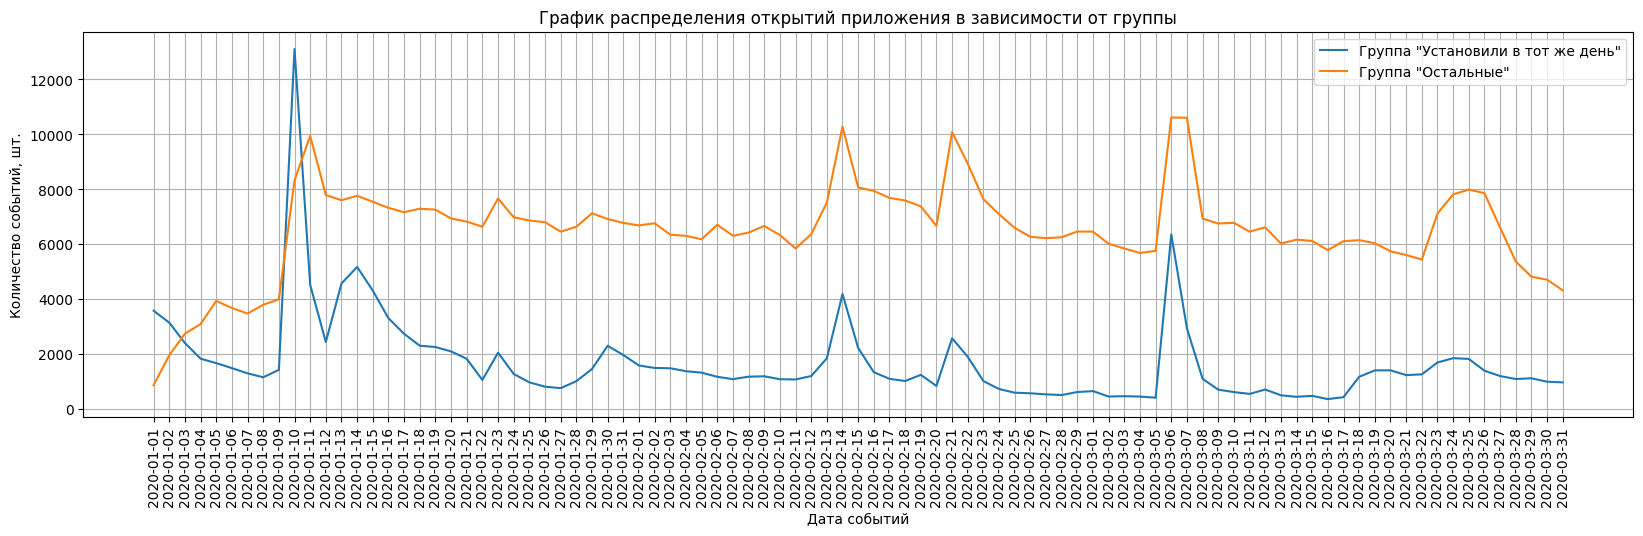

In [10]:
# Построим график открытий приложения по группам установки
df_A = data[(data['install_group'] == 'Установили в этот же день') & (data['event'] == 'app_start')]
df_A = df_A.groupby('date').agg({'install_group':"count"}).reset_index()
df_B = data[(data['install_group'] == 'Остальные') & (data['event'] == 'app_start')]
df_B = df_B.groupby('date').agg({'install_group':"count"}).reset_index()
plt.figure(figsize=(20,5))
x = df_A['date']
y1 =df_A['install_group']
y2 =df_B['install_group']
plt.plot(x, y1, label = 'Группа "Установили в тот же день"')
plt.plot(x, y2, label = 'Группа "Остальные"')
plt.title('График распределения открытий приложения в зависимости от группы')
plt.xticks(rotation = 90)
plt.xlabel("Дата событий")
plt.ylabel("Количество событий, шт.")
plt.legend()
plt.grid(True)
plt.show();

Исходя из анализа графика распределения открытий приложения за весь период, однократно отмечается превышение количества установок и открытия приложения в один день (10 января 2020 года). В целом можно сказать, что в основном пользователи открывают приложение когда оно уже было установлено.

In [11]:
# Определим какая доля открытий приложения 14 февраля пришлась на пользователей, у которых приложение уже было установлено 
pct = round((df_B[df_B['date'] == "2020-02-14"]['install_group'].sum()*100) / (df_B[df_B['date'] == "2020-02-14"]['install_group'].sum() + df_A[df_A['date'] == "2020-02-14"]['install_group'].sum()),0)
print(f'Процент открытий приложения 14 февраля у пользователей, у которых приложение уже было установлено, составляет {pct} %')  

Процент открытий приложения 14 февраля у пользователей, у которых приложение уже было установлено, составляет 71.0 %


#### 3. *Оценим динамику установок приложения по каналам привлечения*

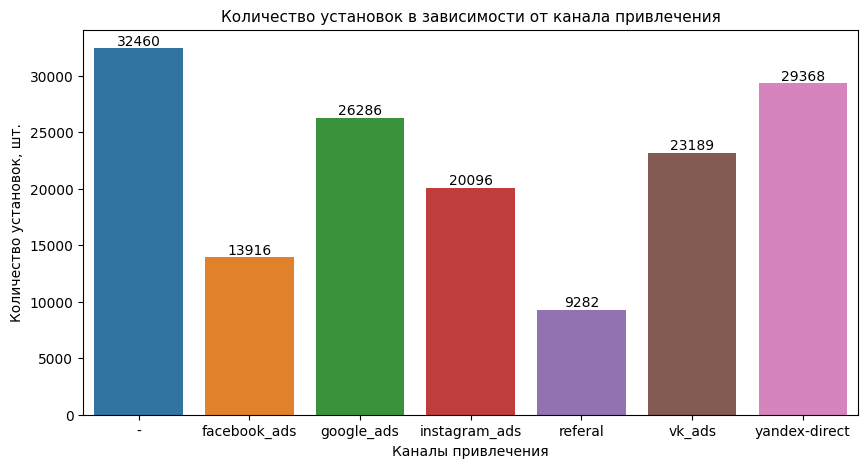

In [12]:
# Найдем количество установок в зависимости от канала привлечения
data_source = data_group_install.groupby('utm_source').agg({'event':'count'}).reset_index()
# Построим столбчатую диаграмму распределения общего количества установок от канала привлечения
fig = plt.figure(figsize = (10,5))
barplot = sns.barplot(data = data_source, x = 'utm_source', y = "event")
barplot.set_title('Количество установок в зависимости от канала привлечения', fontsize = 11)
barplot.set_xlabel('Каналы привлечения')
barplot.set_ylabel('Количество установок, шт.')
barplot.bar_label(barplot.containers[0]);
data_source = data[data['event'] == 'app_install']['event'].count()

Наибольшее количество установок приложения было у пользователей, которые пришли с канала "Яндекс-Директ" (19 % от общего трафика), наименьшее - по реферальной ссылке (6 %) и через Фейсбук (9 %).
Разница в общем количестве установок с канала "Яндекс-Директ" и Фейсбук составляет более 50 %.

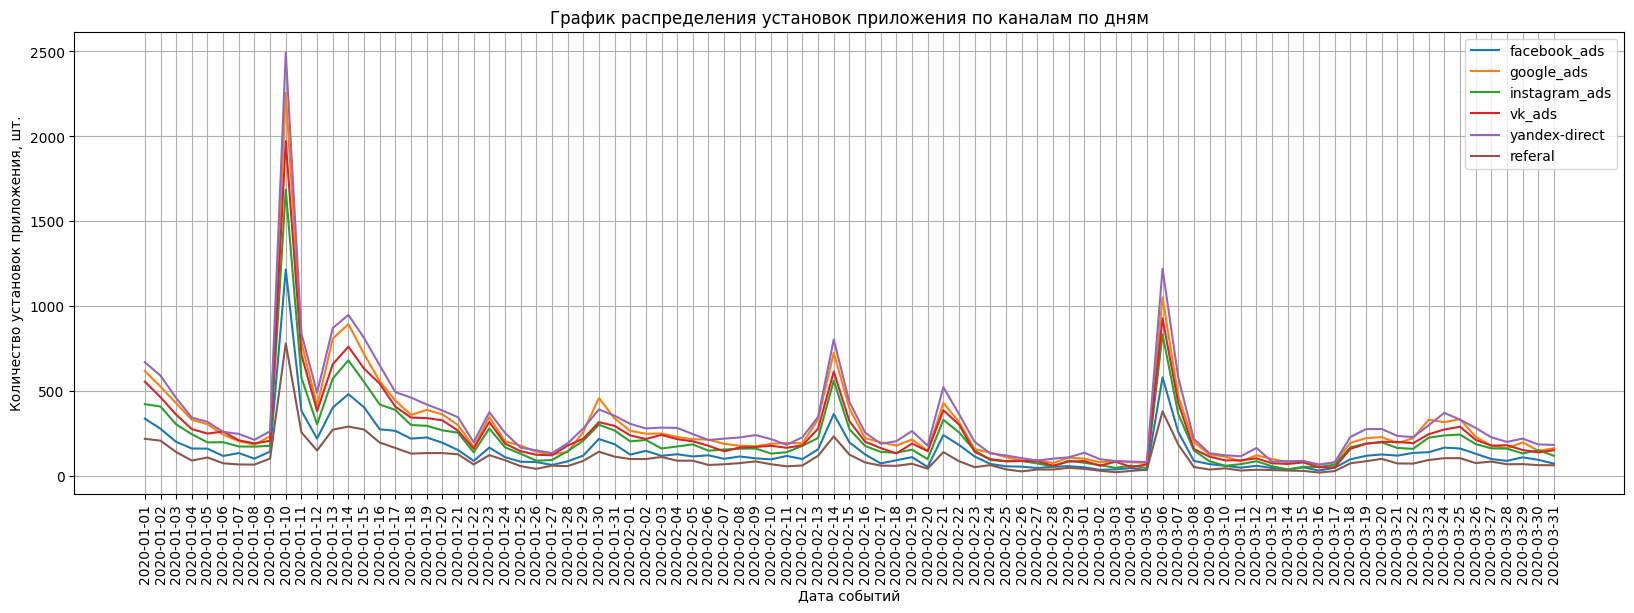

In [13]:
# Построим график по каналам привлечения по дням
data_source_2 = data_group_install.groupby(['date','utm_source'])['event'].count().reset_index()
data_source_fb = data_source_2[data_source_2['utm_source'] == 'facebook_ads']
data_source_g = data_source_2[data_source_2['utm_source'] == 'google_ads']
data_source_ig = data_source_2[data_source_2['utm_source'] == 'instagram_ads']
data_source_vk = data_source_2[data_source_2['utm_source'] == 'vk_ads']
data_source_yd = data_source_2[data_source_2['utm_source'] == 'yandex-direct']
data_source_rf = data_source_2[data_source_2['utm_source'] == 'referal']
plt.figure(figsize=(20,6))
x = data_source_fb['date']
y1 = data_source_fb['event']
y2 = data_source_g['event']
y3 = data_source_ig['event']
y4 = data_source_vk['event']
y5 = data_source_yd['event']
y6 = data_source_rf['event']
plt.plot(x, y1, label = 'facebook_ads')
plt.plot(x, y2, label = 'google_ads')
plt.plot(x, y3, label = 'instagram_ads')
plt.plot(x, y4, label = 'vk_ads')
plt.plot(x, y5, label = 'yandex-direct')
plt.plot(x, y6, label = 'referal')
plt.title('График распределения установок приложения по каналам по дням')
plt.xticks(rotation = 90)
plt.xlabel("Дата событий")
plt.ylabel("Количество установок приложения, шт.")
plt.legend()
plt.grid()
plt.show()

Наибольшее количество установок приложения в динамике по дням также было у пользователей, которые пришли с канала "Яндекс-Директ", наименьшее - по реферальной ссылке и через Фейсбук. Стоит отметить, что периоды, в которые наблюдается подъем количества установок, одинаковые для всех каналов. Разница в установках в будние дни незначительная. А вот в дни подъема количества установок разница по каналам привлечения становится заметной и значительной. Единственное, что переход по реферальной ссылке приносит малое количество установок в сравнении с другими каналами во все дни.
Разработанную маркетинговую кампанию по увеличению количества заказов можно применять на все топовые каналы привлечения.

#### 4. *Определим на каком этапе воронки отваливается б'ольшая часть клиентов (отдельно для зарегистрированных и для незарегистрированных пользователей)*

In [14]:
# Создадим датафрейм, в котором будут только события регистрации, удалим дубликаты по 'device_id'.
first_reg = data[data['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
# Создадим новый столбец, в нем присвоим значение "1" для тех, кто установил приложе№ние
first_reg['finally_reg'] = 1
# Создадим новый столбец в основном датафрейме, добавим столбец с датой установки и признаком установки приложения
data['first_reg'] = data['device_id'].map(first_reg.set_index('device_id')['date'])
data['finally_reg'] = data['device_id'].map(first_reg.set_index('device_id')['finally_reg'])
data.head(3)

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,install_group,first_reg,finally_reg
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,Установили в этот же день,2020-01-07,1.0
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,Установили в этот же день,2020-01-01,1.0
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,Остальные,2020-01-01,1.0


In [15]:
# Оставим такие события, у которых регистрация была раньше текущей даты, создадим новый столбец признака регистрации и проставим значение "1"
already_reg = data[data['first_reg'] < data['date']]
already_reg['registered'] = 1
# Найдем отсутствующие значения в столбце даты регистрации и заменим их на "0"
requires_reg1 = data[(data['first_reg'].isna() == True)]
requires_reg1['registered'] = 0
# Оставим такие события, у которых регистрация была позже текущей даты, создадим новый столбец признака регистрации и проставим значение "0"
requires_reg2 = data[data['first_reg'] >= data['date']]
requires_reg2['registered'] = 0

In [16]:
# Соединим все три полученных датафрейма 
data_reg = pd.concat([already_reg, requires_reg1, requires_reg2])

In [17]:
# Оставим данные только тех, у кого была регистрация раньше текущей даты (зарегистрированные пользователи)
df_registered = data_reg[data_reg['registered'] == 1]
# Создадим таблицу частоты событий в зависимости от канала привлечения и типа события
funnel_reg = pd.crosstab(df_registered.utm_source, df_registered.event, values = df_registered.device_id, aggfunc = pd.Series.nunique)
# Создадим новые столбцы для каждого шага и найдем сколько процентов пользователей перешло на этот шаг с предыдущего
funnel_reg['1 step'] = round(funnel_reg['search']*100 / funnel_reg['app_start'],1)
funnel_reg['2 step'] = round(funnel_reg['choose_item']*100 / funnel_reg['search'],1)
funnel_reg['3 step'] = round(funnel_reg['tap_basket']*100 / funnel_reg['choose_item'],1)
funnel_reg['4 step'] = round(funnel_reg['purchase']*100 / funnel_reg['tap_basket'],1)
funnel_reg 

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,4 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.7,93.3,89.9,70.0
facebook_ads,5606,5154,3333,5527,4694,98.6,93.3,91.1,71.0
google_ads,5399,4948,3121,5335,4438,98.8,92.7,89.7,70.3
instagram_ads,5686,5288,3548,5618,4842,98.8,94.1,91.6,73.3
referal,3647,3417,2382,3610,3155,99.0,94.7,92.3,75.5
vk_ads,6011,5636,3950,5958,5196,99.1,94.6,92.2,76.0
yandex-direct,5396,4928,3099,5304,4464,98.3,92.9,90.6,69.4


По результатам анализа данных отметим, что наибольшее количество зарегистрированных пользователей не доходит до этапа покупки. На остальных шагах наблюдается довольно большая конверсия переходов. Т.е. можно предположить, что пользователей не устраивает итоговая цена, условия доставки или сложность оформления заказа. Необходимо исследовать причины отказа от оформления заказа и принять соответствующие корректировочные меры.

In [18]:
# Оставим данные только тех, у кого была регистрация позже текущей даты (незарегистрированные пользователи)
df_registered_not = data_reg[data_reg['registered'] == 0]
# Создадим таблицу частоты событий в зависимости от канала привлечения и типа события
funnel_reg_not = pd.crosstab(df_registered_not.utm_source, df_registered_not.event, values = df_registered_not.device_id, aggfunc = pd.Series.nunique)
# Создадим новые столбцы для каждого шага и найдем сколько процентов пользователей перешло на этот шаг с предыдущего. 
# Учтем, что незарегистрированные пользователи не могут оформить покупку без шага регистрации
funnel_reg_not['1 step'] = round(funnel_reg_not['search']*100 / funnel_reg_not['app_start'],1)
funnel_reg_not['2 step'] = round(funnel_reg_not['choose_item']*100 / funnel_reg_not['search'],1)
funnel_reg_not['3 step'] = round(funnel_reg_not['tap_basket']*100 / funnel_reg_not['choose_item'],1)
funnel_reg_not['4 step'] = round(funnel_reg_not['register']*100 / funnel_reg_not['tap_basket'],1)
funnel_reg_not['5 step'] = round(funnel_reg_not['purchase']*100 / funnel_reg_not['register'],1)
funnel_reg_not 

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.0,81.4,76.9,56.6,85.2
facebook_ads,13916,23780,18713,7506,8672,22822,14592,96.0,82.0,78.0,59.4,86.6
google_ads,26286,35778,27416,9777,11405,34217,20765,95.6,80.1,75.7,54.9,85.7
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.8,81.6,78.2,60.1,87.4
referal,9282,14866,11880,5503,6193,14316,9518,96.3,83.0,80.1,65.1,88.9
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.8,82.0,78.7,62.1,87.9
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.7,80.1,75.8,55.1,85.7


По результатам анализа данных отметим, что наибольшее количество незарегистрированных пользователей отсеивается на этапе регистрации. При этом процент тех, кто зарегистрировался и оформил далее покупку довольно большой. Можем предположить, что этап регистрации "сбивает" потенциальных покупателей, необходимо продумать как можно упростить данный шаг (сделать проще форму, меньше вводимых данных, нативнее поля).

#### 5. *Определим лучший и худший канал по конверсии в первую покупку.*

In [19]:
# Оставим тех пользователей, кто открыл приложение, отсортируем в порядке убывания даты и удалим дубликаты по 'device_id', т.е.оставим первое открытие приложения
first_opens = data[data['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
# Оставим тех пользователей, кто оплатил покупку, отсортируем в порядке убывания даты и удалим дубликаты по 'device_id', т.е.оставим первую покупку
first_purchase = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
# Соединим два полученнных датафрейма и вычислим процент пользователей оформивших покупку
stat = first_opens.merge(first_purchase, how = 'left', on = 'utm_source')
stat['CR to first purchase, %'] = round(stat['users_y']*100/stat['users_x'],1)
stat.sort_values('CR to first purchase, %', ascending=False)

,utm_source,users_x,users_y,"CR to first purchase, %"
4,referal,11983,5803,48.4
1,facebook_ads,18844,7903,41.9
5,vk_ads,27905,11460,41.1
3,instagram_ads,24818,9820,39.6
0,-,41456,14786,35.7
2,google_ads,31437,10167,32.3
6,yandex-direct,34441,10936,31.8


Наибольшее количество первых покупок происходит у пользователей, пришедших по реферальной ссылке (48,4 %). Можем предположить, что это происходит из-за доверия к полученной рекомендации, т.к. делятся ссылками в основном со знакомыми и друзьями. 
Наименьшее количество первых покупок происходит у пользователей, пришедших из "Яндекс-Директ" (31,8 %).
При этом выше мы оценивали процент когда-либо совершенных покупок (не в первое посещение) и он составлял около 70 % у зарегистрированных покупателей, и больше 85 % у тех, кто зарегистровался прям перед покупкой.

In [20]:
# Найдем каналы, пользователи пришедшие с которых имеют медианный первый чек выше
first_pur = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).agg({'purchase_sum':'median'}).reset_index()
first_pur = first_pur.sort_values('purchase_sum', ascending=False, ignore_index=True)
order = first_pur['purchase_sum'][1]
source = first_pur['utm_source'][1]
print(f'Наибольший первый медианный чек {order} руб. у пользователей, которые пришли с канала "{source}".')

Наибольший первый медианный чек 395.5 руб. у пользователей, которые пришли с канала "referal".


#### 6. *Рассчитаем ROMI для всех каналов*

In [21]:
# Найдем события покупки и сгруппируем по каналу привлечения, найдем доходы по каналам
pur_all = data[data['event'] == 'purchase'].groupby(['utm_source']).agg({'purchase_sum':'sum'}).reset_index()
pur_all

,utm_source,purchase_sum
0,-,21449749.5
1,facebook_ads,12249901.0
2,google_ads,12868276.0
3,instagram_ads,14546969.0
4,referal,8837044.5
5,vk_ads,16389652.5
6,yandex-direct,13915368.0


In [22]:
# Оценим расходы для реферальной программы.
# Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей
# Определим количество пользователей, которые прошли по реферальной ссылке и срвершили покупку.
data[data['event']=='purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

utm_source
-                14786
vk_ads           11460
yandex-direct    10936
google_ads       10167
instagram_ads     9820
facebook_ads      7903
referal           5803
Name: count, dtype: int64

Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей.
Получается, что общие затраты на реферальную программу составили 5803*200=1160600 руб.

In [23]:
# Создадим словарь со значениями расходов на рекламу для платных каналов, соединим с таблицей доходов от покупок и найдем ROMI для каждого канала
dict = {'utm_source':['facebook_ads','google_ads','instagram_ads','referal','vk_ads','yandex-direct'],
        'CPL':[8590498,10534878,8561626,1160600,9553531,10491707]}
dd = pd.DataFrame(dict)
df_ROMI = pur_all.merge(dd, how='left')
df_ROMI = df_ROMI.dropna()
df_ROMI['ROMI, %'] = round((df_ROMI['purchase_sum'] / df_ROMI['CPL']-1)*100,1)
df_ROMI = df_ROMI.sort_values('ROMI, %', ascending=False, ignore_index=True) 
print(f"У канала '{df_ROMI['utm_source'][0]}' ROMI составляет {df_ROMI['ROMI, %'][0]} %")
print(f"У канала '{df_ROMI['utm_source'][1]}' ROMI составляет {df_ROMI['ROMI, %'][1]} %")
print(f"У канала '{df_ROMI['utm_source'][2]}' ROMI составляет {df_ROMI['ROMI, %'][2]} %")
print(f"У канала '{df_ROMI['utm_source'][3]}' ROMI составляет {df_ROMI['ROMI, %'][3]} %")
print(f"У канала '{df_ROMI['utm_source'][4]}' ROMI составляет {df_ROMI['ROMI, %'][4]} %")
print(f"У канала '{df_ROMI['utm_source'][5]}' ROMI составляет {df_ROMI['ROMI, %'][5]} %")

У канала 'referal' ROMI составляет 661.4 %
У канала 'vk_ads' ROMI составляет 71.6 %
У канала 'instagram_ads' ROMI составляет 69.9 %
У канала 'facebook_ads' ROMI составляет 42.6 %
У канала 'yandex-direct' ROMI составляет 32.6 %
У канала 'google_ads' ROMI составляет 22.1 %


Наиболее высокий ROMI у платного канала "ВК" (71,6 %), наименьший у канала "google_ads" (22,1 %).
Высочайший ROI наблюдается у реферальной программы (661,4 %). Получается наиболее выгодный канал привлечения клиентов это реферальная программа, а из платных каналов - "ВК".

#### 7. *Сформируем таблицу когорт (в абс. и %) по неделе первого посещения. Определим самую большую и самую активную когорту.*

In [24]:
# Приведем столбец с датой к необходимому типу
data_cohort = data.copy()
data_cohort['date'] = pd.to_datetime(data_cohort['date'])

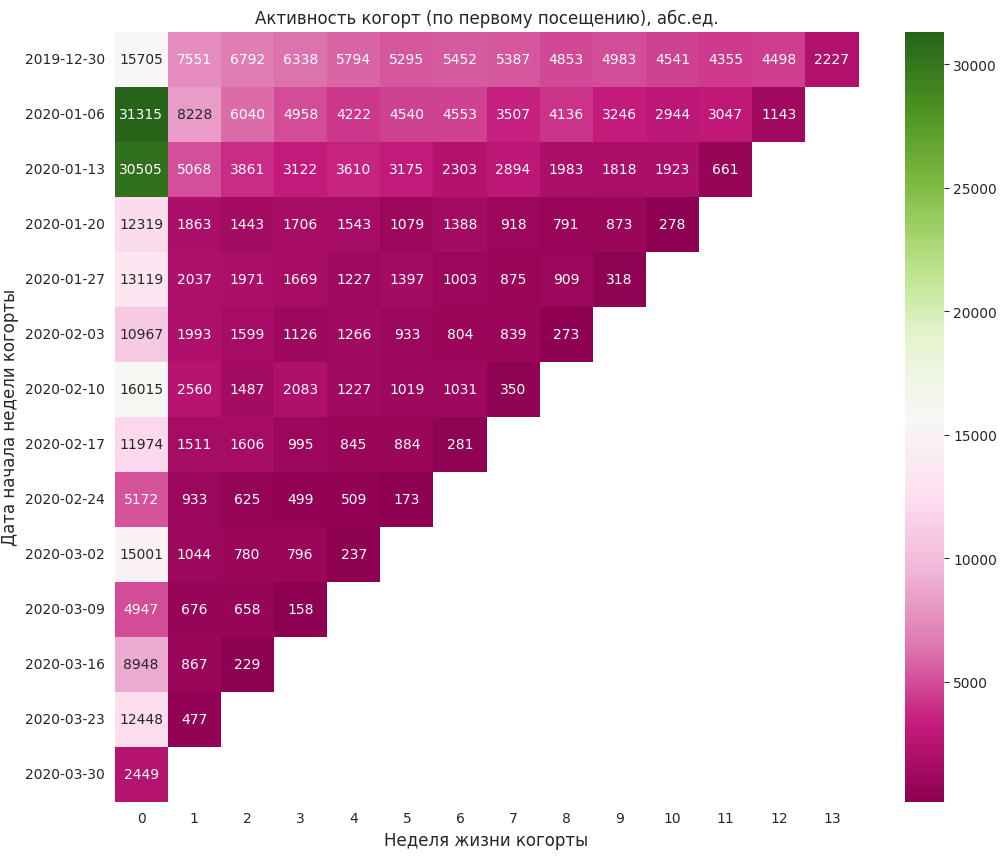

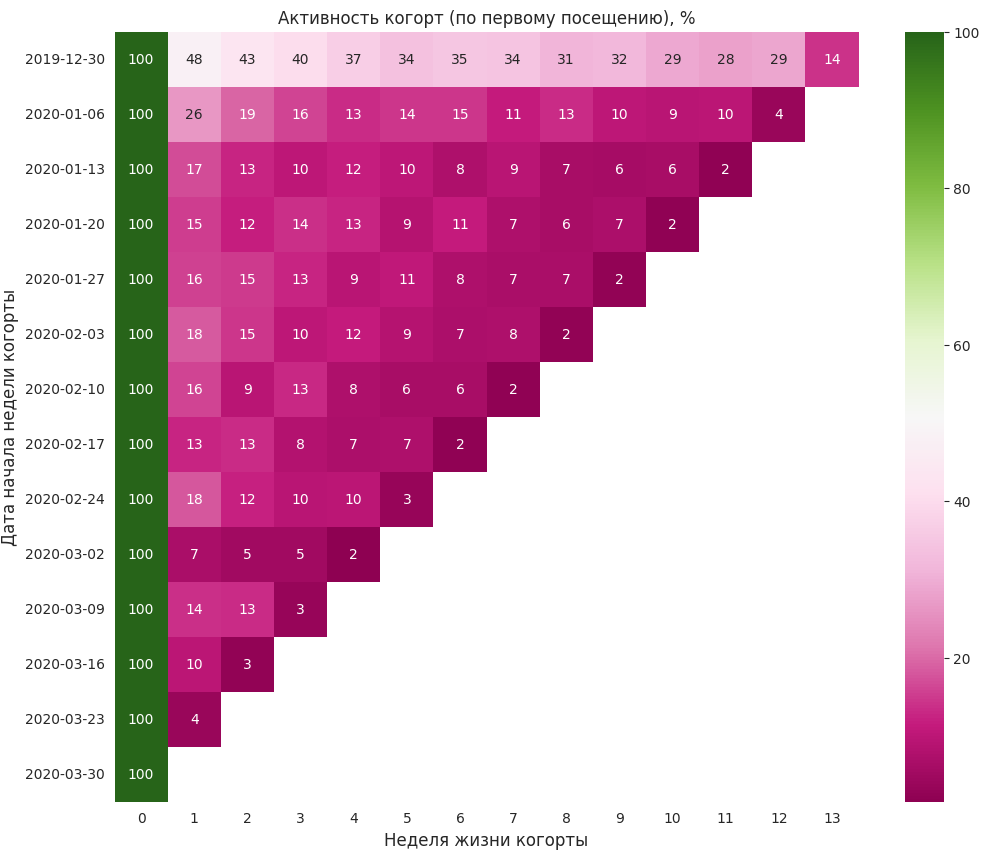

In [25]:
# Сформируем когорты по первому посещению (открытию) приложения
entrances = data_cohort[data_cohort['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
# Добавим новый столбец первого открытия
data_cohort['first_entrance'] = data_cohort['device_id'].map(entrances.set_index('device_id')['date'])
data_cohort['first_entrance_cohort'] = data_cohort['first_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
# Вычислим неделю жизни когорты
data_cohort['n_week'] = data_cohort['date'] - data_cohort['first_entrance_cohort']
data_cohort['n_week'] = data_cohort['n_week'].apply(lambda x: x.days // 7 )
# Приводим дату к формату строки
data_cohort['first_entrance_cohort'] = data_cohort['first_entrance_cohort'].apply(lambda x: str(x)[:10])
viz = data_cohort.pivot_table(
                        index='first_entrance_cohort', 
                        columns='n_week', 
                        values='device_id', 
                        aggfunc=pd.Series.nunique)
# Построим две тепловые карты распределения количества пользователей по открытиям приложения в разрезе недельных когорт в абсолютных единицах и % 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="PiYG")
    ax.set_title('Активность когорт (по первому посещению), абс.ед.')
    plt.xlabel('Неделя жизни когорты', fontsize = 12)
    plt.ylabel('Дата начала недели когорты', fontsize = 12);
    
viz = viz.apply(lambda x: x*100/viz[0])
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="PiYG")
    ax.set_title('Активность когорт (по первому посещению), %')
    plt.xlabel('Неделя жизни когорты', fontsize = 12)
    plt.ylabel('Дата начала недели когорты', fontsize = 12);

Наиболее большие по численности когорты, пришедшие 06-01-2020 (31315 чел.) и 13-01-2020 (30505 чел.). Но наиболее активная когорта, пришедшая 31-12-2019г. Данная когорта активнее большинства других когорт более чем в 2 раза. Т.е. на новогодних праздниках данная когорта активно пользовалась приложением.

#### 8. *Сформируем таблицу когорт (в абс. и %) по неделе первой покупки. Определим самую активную когорту и проанализируем динамику активности.*

In [26]:
# Сформируем когорты по первой покупке
purchases = data_cohort[data_cohort['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
data_cohort['first_purchase'] = data_cohort['device_id'].map(purchases.set_index('device_id')['date'])
df_cohort = data_cohort[-data_cohort['first_purchase'].isna()]
df_cohort['first_purchase_cohort'] = df_cohort['first_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
# Вычислим неделю жизни когорты
df_cohort['n_week'] = df_cohort['date'] - df_cohort['first_purchase_cohort']
df_cohort['n_week'] = df_cohort['n_week'].apply(lambda x: x.days // 7 )
# Приводим дату к формату строки
df_cohort['first_purchase_cohort'] = df_cohort['first_purchase_cohort'].apply(lambda x: str(x)[:10])


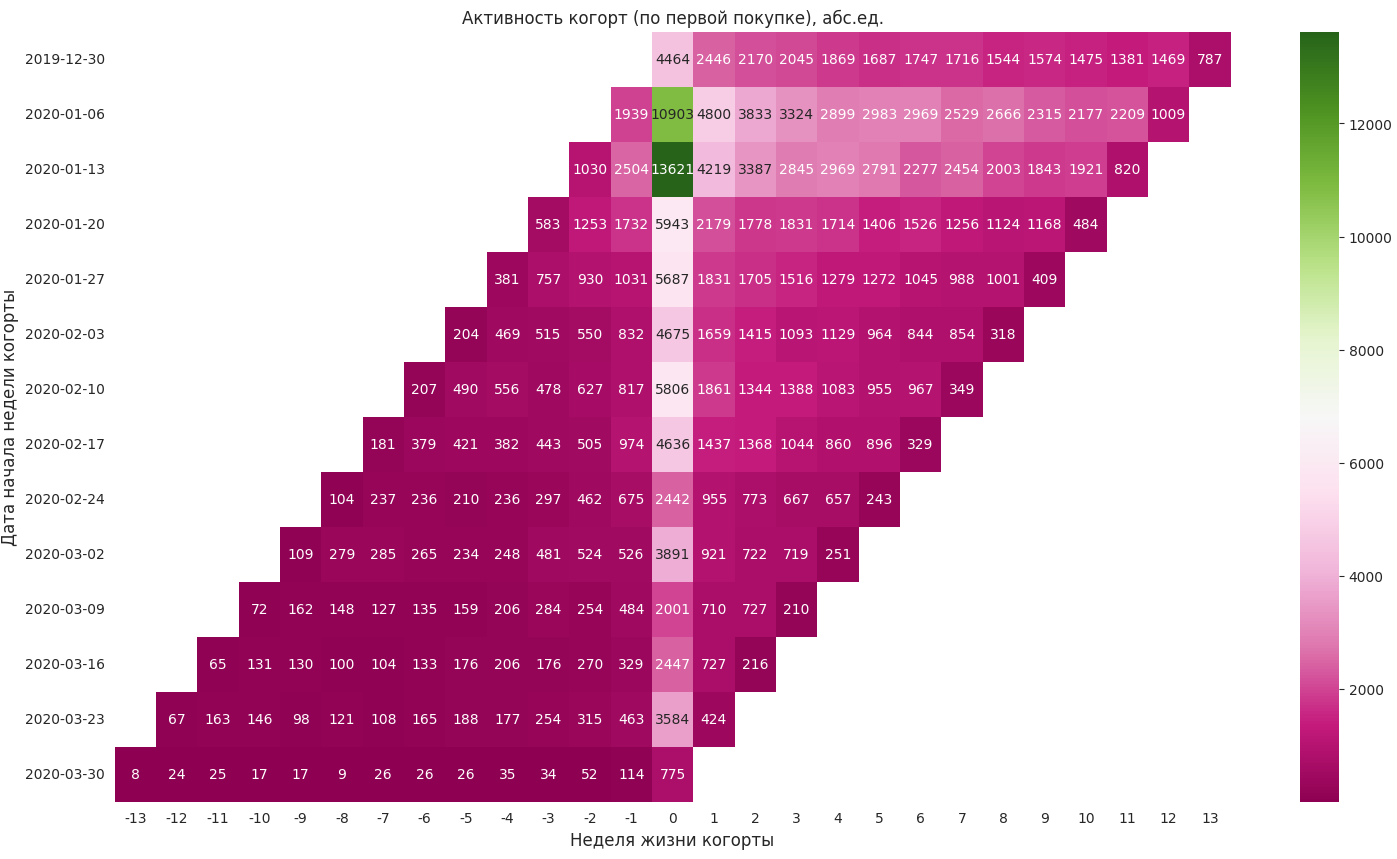

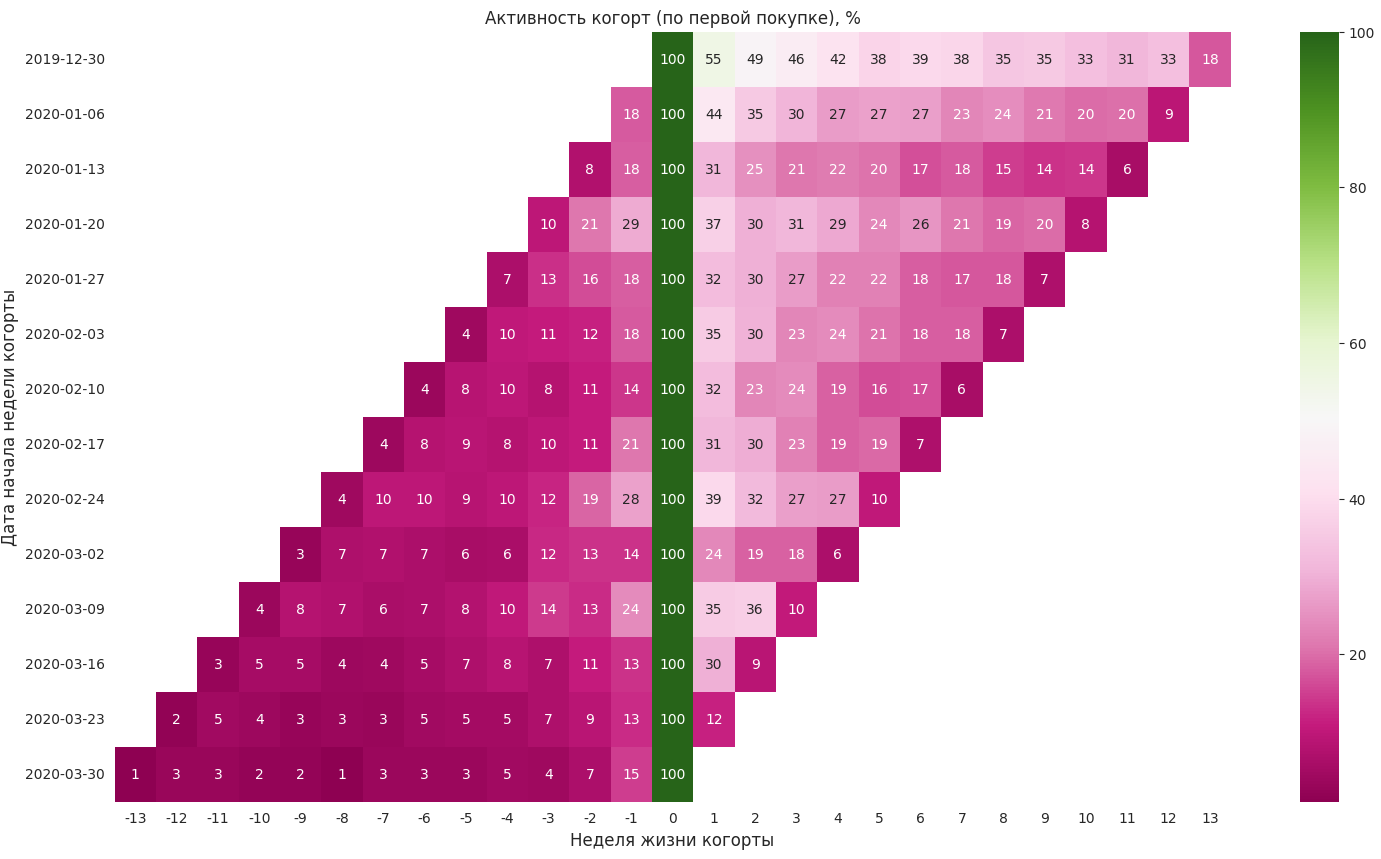

In [27]:
# Построим две тепловые карты в разрезе недельных когорт первой покупки в абсолютных единицах и % 
viz_3 = df_cohort.pivot_table(
                        index='first_purchase_cohort', 
                        columns='n_week', 
                        values='device_id', 
                        aggfunc=pd.Series.nunique)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(viz_3, annot=True, fmt=".0f", cmap="PiYG");
    ax.set_title('Активность когорт (по первой покупке), абс.ед.')
    plt.xlabel('Неделя жизни когорты', fontsize = 12)
    plt.ylabel('Дата начала недели когорты', fontsize = 12);
viz_3 = viz_3.apply(lambda x: x*100/viz_3[0])
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(viz_3, annot=True, fmt=".0f", cmap="PiYG")
    ax.set_title('Активность когорт (по первой покупке), %')
    plt.xlabel('Неделя жизни когорты', fontsize = 12)
    plt.ylabel('Дата начала недели когорты', fontsize = 12);

Исходя из полученных данных, отмечается рост количества открытий приложения от неделе к неделе до момента оформления покупки у всех когорт. После оформления покупки активность когорт постепенно снижается, но преимущественно остается выше, чем до покупки (за исключением последней недели жизни когорты). Особенно активной когортой является когорта, совершившая покупку 30-12-2019г. На следующую неделю после оформления покупки сохраняют активность около 30 % пользователей. Необходимо продумать условия программы лояльности для постоянных клиентов, тем самым увеличивая количество посещений и повторных заказов из недели в неделю. Наиболее большие по численности когорты: 06-01-2020г. (10903 чел.) и 13-01-2020г. (13621 чел.). У когорты 06-01-2020г. довольно большой процент активности на следующей неделе (44 %).

In [28]:
# Определим общую сумму, которую приносят когорты за весь свой срок жизни
df_cohort_sum = df_cohort[df_cohort['event'] == 'purchase']
df_cohort_sum.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,19787838.0
2,2020-01-13,18852452.0
0,2019-12-30,12320177.5
3,2020-01-20,9018049.5
4,2020-01-27,7432634.0
6,2020-02-10,6766314.0
5,2020-02-03,6305237.0
7,2020-02-17,5398837.5
9,2020-03-02,3629773.0
8,2020-02-24,3067633.5


Когорты, приносящая наибольшее количество денег, это когорты 06-01-2020г. (19787838 руб.) и 13-01-2020г. (18852452 руб.). При этом стоит отметить, что у когорты 06-01-2020г не самый большой срок жизни из всех когорт. Три когорты, которые пришли накануне и после новогодних праздников, во время каникул, являются наиболее приносящими прибыль. Необходимо учесть этот фактор при формировании рекомендаций для развития бизнеса.

#### 9. *Рассчитаем средний/медианный чек по когортам (недели первой покупки) в каждую неделю с момента первой покупки*

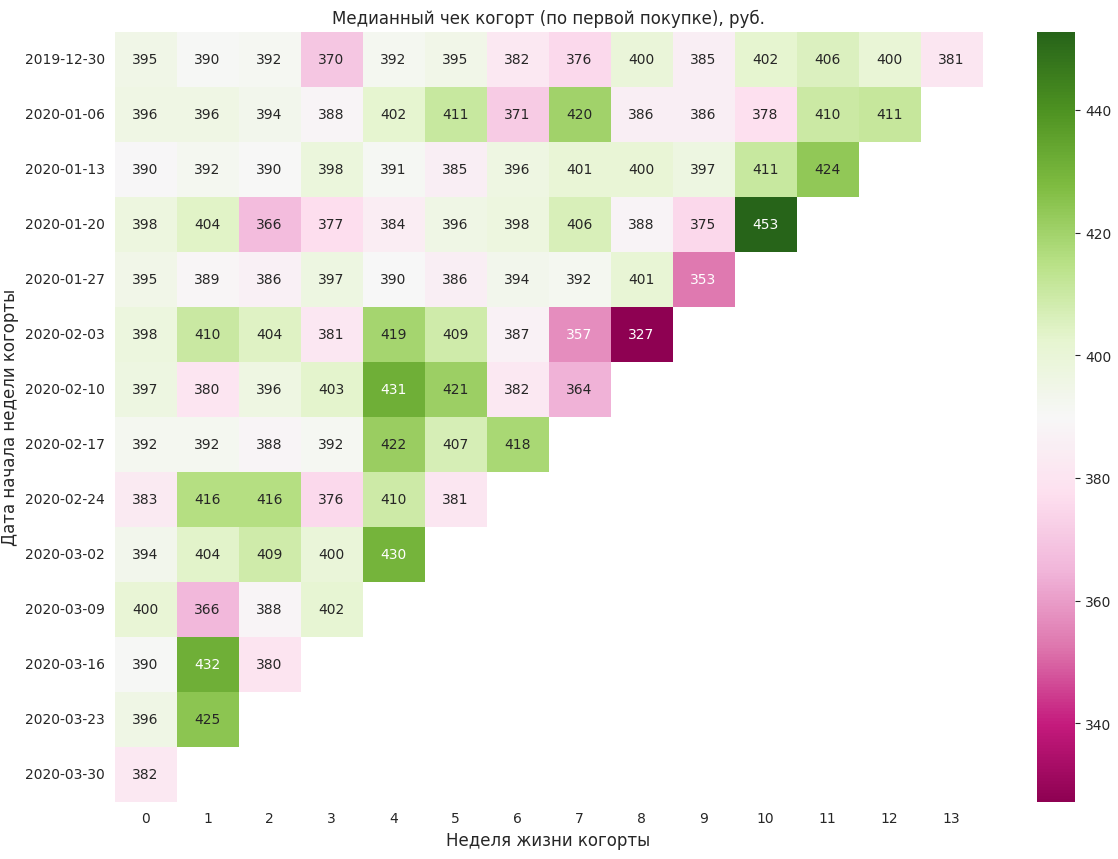

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
# Построим тепловую карту медианного чека в разрезе недельных когорт первой покупке 
    viz_3 = df_cohort.pivot_table(
                        index='first_purchase_cohort', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc=pd.Series.median)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(14, 10))
        ax = sns.heatmap(viz_3, annot=True, fmt=".0f", cmap="PiYG");
        ax.set_title('Медианный чек когорт (по первой покупке), руб.')
        plt.xlabel('Неделя жизни когорты', fontsize = 12)
        plt.ylabel('Дата начала недели когорты', fontsize = 12);

Медианный чек на неделе первой покупки наибольший у когорты, пришедшей 09-03-2020г. (400 руб.). В целом можно отметить примерно одинаковое значение медианного чека на неделе первой покупки у всех когорт. Исходя из общей картины распределения медианного чека невозможно сказать о закономерности падения/увеличения чека по неделям жизни когорт. Где-то у когорт есть снижение чека (когорта от 03-02-2020 на 8 неделю жизни), где-то увеличение чека (20-01-2020 на 10 неделю жизни когорты). В среднем значения медианного чека составляют 353-432 руб. (без учета самого низкого и высокого значения).

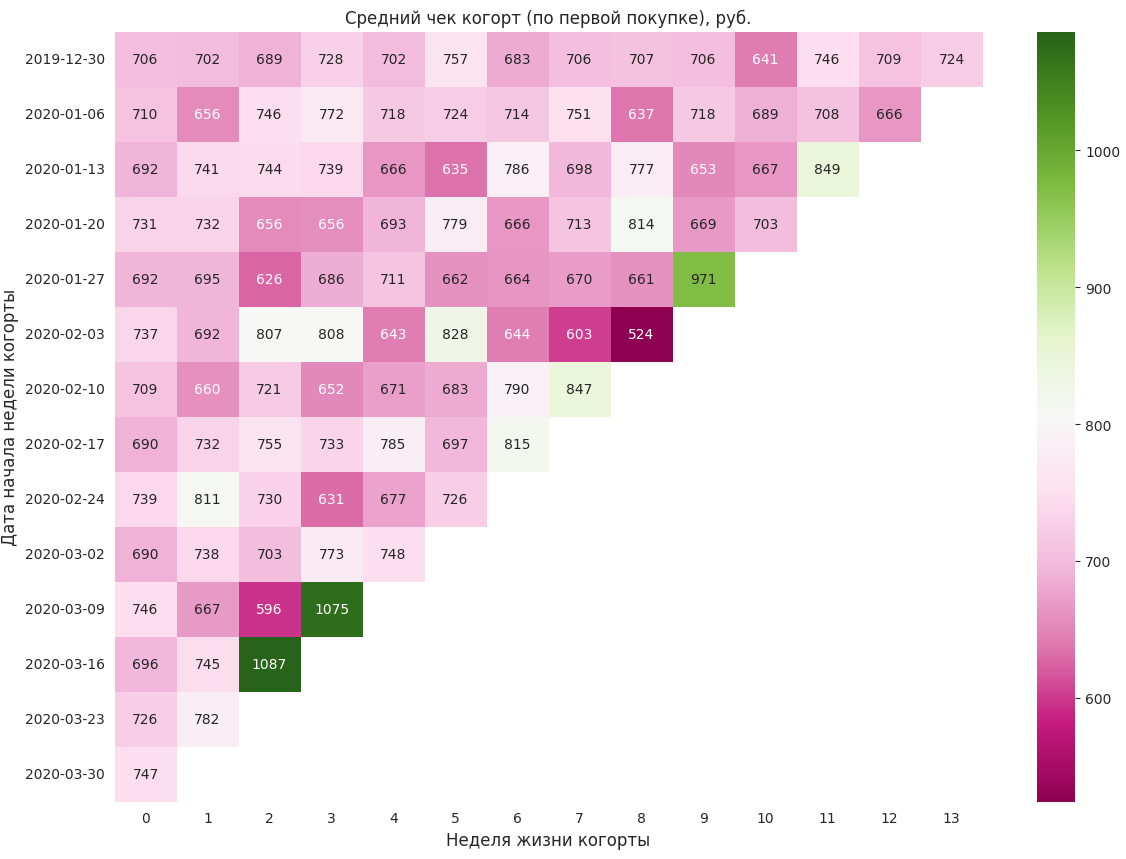

In [30]:
# Построим тепловую карту среднего чека в разрезе недельных когорт первой покупке 
viz_3 = df_cohort.pivot_table(
                        index='first_purchase_cohort', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc=pd.Series.mean)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz_3, annot=True, fmt=".0f", cmap="PiYG");
    ax.set_title('Средний чек когорт (по первой покупке), руб.')
    plt.xlabel('Неделя жизни когорты', fontsize = 12)
    plt.ylabel('Дата начала недели когорты', fontsize = 12);

Средний чек на неделе первой покупки наибольший у когорты, пришедшей 30-03-2020г. (747 руб.). По данной когорте данные в анализе присутствуют только за два дня. У двух когорт в последнюю неделю жизни наблюдается резкий скачок среднего чека ( когорты 09-03-2020г. и 16-03-2020г.), при этом в эти периоды нет праздников. В целом можно сказать, что распределение среднего чека по неделям жизни когорт примерно одинаковое (в диапазоне 603-849 руб), если не учитывать всплески и два падения среднего чека (у когорты 03-02-2020г. на 8 неделю жизни, 09-03-2020г. на 2 неделю жизни).

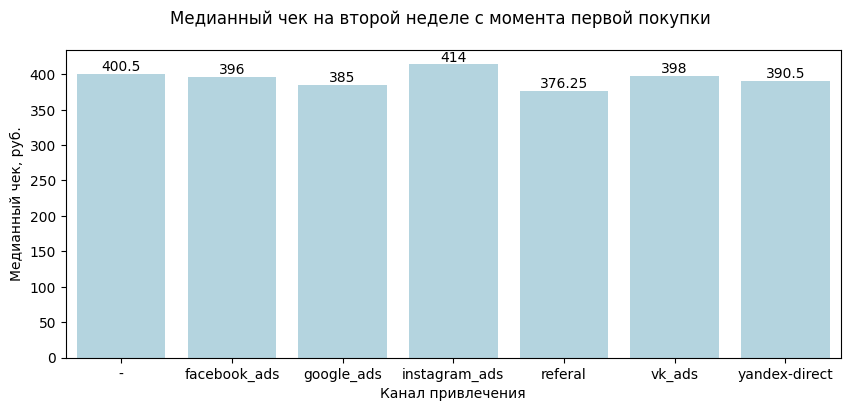

In [31]:
# Сравним медианный чек на второй неделе с момента первой покупки для всех каналов привлечения.
viz_4 = df_cohort[df_cohort['n_week'] == 1].groupby(['utm_source'])['purchase_sum'].median().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,4))
fig.suptitle('Медианный чек на второй неделе с момента первой покупки', fontsize = 12)
barplot = sns.barplot(data = viz_4, ax = axes, x = 'utm_source', y = 'purchase_sum', color = 'lightblue')
axes.set_xlabel('Канал привлечения')
axes.set_ylabel('Медианный чек, руб.')
axes.bar_label(barplot.containers[0]);

Медианный чек на второй неделе с момента первой покупки наибольший у канала "instagram_ads" (414 руб.), наименьший - по реферальной ссылке (376 руб.). В целом медианный чек у остальных каналов примерно одинаковый (385-400 руб).

### Выводы по результатам проведенного анализа данных
1. Из графика распределения событий по дням отчетливо виден скачок количества событий 10 января 2020, 14 февраля 2020, 21 февраля 2020, 06 марта 2020, т.е. в периоды: после новогодних праздников и в день накануне праздников. Наибольшее количество событий отмечается 10 января 2020 в пятницу в неполную рабочую неделю. 
Отмечается прямая зависимость между открытиями приложения, поиском товаров и покупкой. Количество поисков товара практически равно количеству открытий приложения. Т.е. люди заходят с определенной целью: найти необходимый товар. При этом количество покупок значительно меньше, т.е. большинство пользователей не оформляют покупку. 
2. Из графика распределения открытий приложения (по группам установки) за весь период однократно отмечается превышение количества установок и открытия приложения тех, кто установил и открыл приложение в один день (10 января 2020 года). В целом можно сказать, что в основном пользователи открывают приложение когда оно уже было установлено.
3. Наибольшее количество установок приложения было у пользователей, которые пришли с канала "Яндекс-Директ" (19 % от общего трафика), наименьшее - по реферальной ссылке (6 %) и через Фейсбук (9 %).
Наибольшее количество установок приложения в динамике по дням также было у пользователей, которые пришли с канала "Яндекс-Директ", наименьшее - по реферальной ссылке и через Фейсбук. Стоит отметить, что периоды, в которые наблюдается подъем количества установок, одинаковые для всех каналов. Разница в установках в будние дни незначительная. А вот в дни подъема количества установок разница по каналам привлечения становится заметной и значительной. Единственное, что переход по реферальной ссылке приносит малое количество установок в сравнении с другими каналами во все дни.
4. Наибольшее количество зарегистрированных пользователей не доходит до этапа покупки. На остальных шагах наблюдается довольно большая конверсия переходов.
Наибольшее количество незарегистрированных пользователей отсеивается на этапе регистрации. При этом процент тех, кто зарегистрировался и оформил далее покупку довольно большой. 
5. Наибольшее количество первых покупок происходит у пользователей, пришедших по реферальной ссылке (48,4 %). Можем предположить, что это происходит из-за доверия к полученной рекомендации, т.к. делятся ссылками в основном со знакомыми и друзьями. 
Наименьшее количество первых покупок происходит у пользователей, пришедших из "Яндекс-Директ" (31,8 %).
При этом выше мы оценивали процент когда-либо совершенных покупок (не в первое посещение) и он составлял около 70 % у зарегистрированных покупателей, и больше 85 % у тех, кто зарегистровался прям перед покупкой.
6. Наиболее высокий ROMI у платного канала "ВК" (71,6 %), наименьший у канала "google_ads" (22,1 %).
Высочайший ROI наблюдается у реферальной программы (661,4 %). Наиболее выгодный канал привлечения клиентов это реферальная программа, а из платных каналов - "ВК".
7. Наиболее большие по численности когорты, пришедшие 06-01-2020 (31315 чел.) и 13-01-2020 (30505 чел.). Но наиболее активная когорта, пришедшая 31-12-2019г. Данная когорта активнее большинства других когорт более чем в 2 раза. Т.е. на новогодних праздниках данная когорта активно пользовалась приложением.
8. Отмечается рост количества открытий приложения от неделе к неделе до момента оформления покупки у всех когорт. После оформления покупки активность когорт постепенно снижается, но преимущественно остается выше, чем до покупки (за исключением последней недели жизни когорты). Особенно активной когортой является когорта, совершившая покупку 30-12-2019г. На следующую неделю после оформления покупки сохраняют активность около 30 % пользователей. Необходимо продумать условия программы лояльности для постоянных клиентов, тем самым увеличивая количество посещений и повторных заказов из недели в неделю. Наиболее большие по численности когорты: 06-01-2020г. (10903 чел.) и 13-01-2020г. (13621 чел.). У когорты 06-01-2020г. довольно большой процент активности на следующей неделе (44 %).
Когорты, приносящая наибольшее количество денег, это когорты 06-01-2020г. (19787838 руб.) и 13-01-2020г. (18852452 руб.). При этом стоит отметить, что у когорты 06-01-2020г не самый большой срок жизни из всех когорт. Три когорты, которые пришли накануне и после новогодних праздников, во время каникул, являются наиболее приносящими прибыль.
9. Медианный чек на неделе первой покупки наибольший у когорты, пришедшей 09-03-2020г. (400 руб.). В целом можно отметить примерно одинаковое значение медианного чека на неделе первой покупки у всех когорт. Исходя из общей картины распределения медианного чека невозможно сказать о закономерности падения/увеличения чека по неделям жизни когорт. Где-то у когорт есть снижение чека (когорта от 03-02-2020 на 8 неделю жизни), где-то увеличение чека (20-01-2020 на 10 неделю жизни когорты). В среднем значения медианного чека составляют 353-432 руб. (без учета самого низкого и высокого значения).
Средний чек на неделе первой покупки наибольший у когорты, пришедшей 30-03-2020г. (747 руб.). По данной когорте данные в анализе присутствуют только за два дня. У двух когорт в последнюю неделю жизни наблюдается резкий скачок среднего чека ( когорты 09-03-2020г. и 16-03-2020г.), при этом в эти периоды нет праздников. В целом можно сказать, что распределение среднего чека по неделям жизни когорт примерно одинаковое (в диапазоне 603-849 руб), если не учитывать всплески и два падения среднего чека (у когорты 03-02-2020г. на 8 неделю жизни, 09-03-2020г. на 2 неделю жизни).

### Рекомендации
1. Необходимо проработать маркетинговую стратегию для увеличения количества заказов в будние дни (промокоды, "счастливые" часы, бонусы, подарок, бесплатная доставка), а также увеличить количество заказов в праздники (спецпредложения, подарки, тематические наборы, бесплатная доставка). В праздники можно выполнять рекламную рассылку с индивидуальными предложениями или наборами, это благоприятное время когда большинство людей отдыхают и готовы заказывать еду. 
2. Необходимо исследовать причины отказа от оформления заказа после добавления товаров в корзину и принять соответствующие корректировочные меры. Можно предположить, что пользователей не устраивает итоговая цена, условия доставки или сложность оформления заказа. Исходя из этого, сделать корректировку предлагаемых товаров, условий доставки или учесть другие влияющие факторы.
3. Необходимо продумать как можно упростить шаг регистрации пользователей (сделать проще форму, меньше вводимых данных, сделать нативнее поля), чтобы увеличить количество заказов от пользователей, которые не регистрировались, но складывали в корзину товары.
4. Активность пользователей можно поддерживать рассылая пуш-уведомления с новинками/предложениями раз в неделю, тем самым поддерживать интерес к приложению. Если пользователь долго не заходит/не оформляет заказ, то предлагать индивидуальный промокод на заказ с ограниченным сроком действия. Активным клиентам ввести программу лояльности/накопления бонусов с возможностью применения бонусов в дальнейшем.
5. Для увеличения среднего/медианного чека можно использовать систему поощрения: при покупке на определенную сумму добавлять подарок в зависимости от суммы заказа.
6. Разработанную маркетинговую кампанию по увеличению количества заказов можно применять на все топовые платные каналы привлечения (Яндекс-Директ, google_ads, VK).
7. Отдельное внимание нужно уделить реферальной программе, т.к. у нее очень высокий ROI, количество первых покупок, но при этом очень малое количество установок приложения. Стоит упоминать о ней на главной странице приложения, в личном кабинете (выделить строку со ссылкой) или периодически рассылать пуш-уведомления с напоминанием о возможности поделиться с друзьями/знакомыми ссылкой.